<a href="https://colab.research.google.com/github/jocsakesley/Analise_de_Apartamentos_Natal/blob/master/Analise_apartamentos_Natal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from math import sqrt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#lendo o arquivo csv
df = pd.read_csv("/content/drive/My Drive/Webscreping_vivareal/apartamentos_natal.csv")

#Tratando colunas com valores numéricos

In [3]:
#removendo caracteres das strings para converter em valores numéricos
df['aluguel'] = df['aluguel'].str.lstrip('R$ ').str.rstrip(' ').str.replace(".","")
df['condominio'] = df['condominio'].str.lstrip('R$ ').str.rstrip(' ').str.replace(".","")
df['iptu'] = df['iptu'].str.lstrip('R$ ').str.rstrip(' ').str.replace(".","")
df['suite'] = df['suite'].str.rstrip(' suíte')
df

,links,endereco,aluguel,tipo_aluguel,condominio,iptu,area,quartos,banheiros,suite,vagas
0,https://www.vivareal.com.br/imovel/apartamento...,"Rua Professor Arthéphio Bezerra, 210 - Lagoa N...",1450,/Mês,NaN,NaN,110.0,4.0,3.0,1,2.0
1,https://www.vivareal.com.br/imovel/apartamento...,"Rua Tenente Olávo Francisco dos Santos, 98 - V...",2700,/Mês,NaN,NaN,110.0,3.0,3.0,3,2.0
2,https://www.vivareal.com.br/imovel/apartamento...,"Avenida das Brancas Dunas, 65 - Candelária, Na...",1500,/Mês,NaN,NaN,57.0,2.0,2.0,1,1.0
3,https://www.vivareal.com.br/imovel/apartamento...,"Avenida Deputado Antônio Florêncio de Queiroz,...",2500,/Mês,NaN,NaN,79.0,3.0,2.0,1,2.0
4,https://www.vivareal.com.br/imovel/apartamento...,"Rua Vereador Manoel Coringa de Lemos, 259 - Po...",850,/Mês,NaN,NaN,40.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1917,https://www.vivareal.com.br/imovel/apartamento...,"Avenida Estrela do Mar, 2215 - Ponta Negra, Na...",1500,/Mês,385,1500,60.0,2.0,1.0,1,1.0
1918,https://www.vivareal.com.br/imovel/apartamento...,"Ponta Negra, Natal - RN",1800,/Mês,NaN,NaN,52.0,2.0,1.0,NaN,1.0
1919,https://www.vivareal.com.br/imovel/apartamento...,"Areia Preta, Natal - RN",8500,/Mês,NaN,NaN,424.0,4.0,5.0,4,5.0
1920,https://www.vivareal.com.br/imovel/apartamento...,"Avenida dos Caiapós, 121 - Pitimbu, Natal - RN",1200,/Mês,NaN,NaN,49.0,2.0,1.0,NaN,1.0


In [4]:
#transformando as colunas numéricas que estão como string, em valores numéricos
df['aluguel'] = pd.to_numeric(df['aluguel'])
df['condominio'] = pd.to_numeric(df['condominio'])
df['iptu'] = pd.to_numeric(df['iptu'])
df['suite'] = pd.to_numeric(df['suite'])
df

,links,endereco,aluguel,tipo_aluguel,condominio,iptu,area,quartos,banheiros,suite,vagas
0,https://www.vivareal.com.br/imovel/apartamento...,"Rua Professor Arthéphio Bezerra, 210 - Lagoa N...",1450.0,/Mês,NaN,NaN,110.0,4.0,3.0,1.0,2.0
1,https://www.vivareal.com.br/imovel/apartamento...,"Rua Tenente Olávo Francisco dos Santos, 98 - V...",2700.0,/Mês,NaN,NaN,110.0,3.0,3.0,3.0,2.0
2,https://www.vivareal.com.br/imovel/apartamento...,"Avenida das Brancas Dunas, 65 - Candelária, Na...",1500.0,/Mês,NaN,NaN,57.0,2.0,2.0,1.0,1.0
3,https://www.vivareal.com.br/imovel/apartamento...,"Avenida Deputado Antônio Florêncio de Queiroz,...",2500.0,/Mês,NaN,NaN,79.0,3.0,2.0,1.0,2.0
4,https://www.vivareal.com.br/imovel/apartamento...,"Rua Vereador Manoel Coringa de Lemos, 259 - Po...",850.0,/Mês,NaN,NaN,40.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1917,https://www.vivareal.com.br/imovel/apartamento...,"Avenida Estrela do Mar, 2215 - Ponta Negra, Na...",1500.0,/Mês,385.0,1500.0,60.0,2.0,1.0,1.0,1.0
1918,https://www.vivareal.com.br/imovel/apartamento...,"Ponta Negra, Natal - RN",1800.0,/Mês,NaN,NaN,52.0,2.0,1.0,NaN,1.0
1919,https://www.vivareal.com.br/imovel/apartamento...,"Areia Preta, Natal - RN",8500.0,/Mês,NaN,NaN,424.0,4.0,5.0,4.0,5.0
1920,https://www.vivareal.com.br/imovel/apartamento...,"Avenida dos Caiapós, 121 - Pitimbu, Natal - RN",1200.0,/Mês,NaN,NaN,49.0,2.0,1.0,NaN,1.0


In [5]:
#Verificando os tipos de dados após conversão
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   links         1922 non-null   object 
 1   endereco      1903 non-null   object 
 2   aluguel       1903 non-null   float64
 3   tipo_aluguel  1898 non-null   object 
 4   condominio    569 non-null    float64
 5   iptu          332 non-null    float64
 6   area          1903 non-null   float64
 7   quartos       1901 non-null   float64
 8   banheiros     1900 non-null   float64
 9   suite         1563 non-null   float64
 10  vagas         1763 non-null   float64
dtypes: float64(8), object(3)
memory usage: 165.3+ KB


#Tratando valores nulos e excluindo linhas

In [6]:
# Verificando os valores nulos
df.isna().sum()

links              0
endereco          19
aluguel           19
tipo_aluguel      24
condominio      1353
iptu            1590
area              19
quartos           21
banheiros         22
suite            359
vagas            159
dtype: int64

In [7]:
#removendo todas as linhas em que o endereço é nulo
df.dropna(subset=['endereco'], inplace=True)
df.isna().sum()

links              0
endereco           0
aluguel            0
tipo_aluguel       5
condominio      1334
iptu            1571
area               0
quartos            2
banheiros          3
suite            340
vagas            140
dtype: int64

In [8]:
# verificando a periodicidade do aluguel
df['tipo_aluguel'].value_counts()

/Mês       1853
/Dia         44
/Semana       1
Name: tipo_aluguel, dtype: int64

In [9]:
# removendo as linhas em que o periodo de pagamento é diferente de /Mês
df.drop(df[df['tipo_aluguel'] != "/Mês"].index, inplace=True)
df['tipo_aluguel'].value_counts()

/Mês    1853
Name: tipo_aluguel, dtype: int64

In [10]:
# Preenchendo os valores nulos das colunas "condominio", "iptu", "suite" e "vagas", com "0", considerando que se o valor não foi atribuído é mais provável que não possua
df['condominio'].fillna(0, inplace=True)
df['iptu'].fillna(0, inplace=True)
df['suite'].fillna(0, inplace=True)
df['vagas'].fillna(0, inplace=True)
df.isna().sum()

links           0
endereco        0
aluguel         0
tipo_aluguel    0
condominio      0
iptu            0
area            0
quartos         2
banheiros       3
suite           0
vagas           0
dtype: int64

In [11]:
# Preenchendo os valores nulos de "quartos" e "banheiros", com a média, considerando que é improvável que um apartamento não possua esses cômodos  
df['quartos'].fillna(int(df['quartos'].mean()), inplace=True)
df['banheiros'].fillna(int(df['banheiros'].mean()), inplace=True)
df.isna().sum()

links           0
endereco        0
aluguel         0
tipo_aluguel    0
condominio      0
iptu            0
area            0
quartos         0
banheiros       0
suite           0
vagas           0
dtype: int64

#Removendo outliers

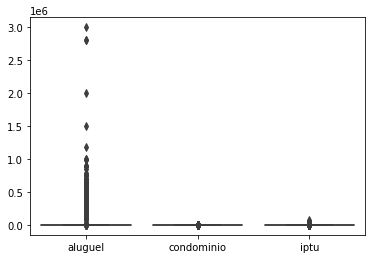

In [12]:
# verificando possíveis outliers em colunas da mesma escala (R$)
sns.boxplot(data=df, order=['aluguel', 'condominio', 'iptu'])

In [13]:
# Verificando o intervalo que exclui os outliers da coluna aluguel,  em percentil. Os valores muito altos provavelmente referem-se a valor de venda.
q00 = df["aluguel"].quantile(.0)
q89 = df["aluguel"].quantile(.89)
print(q00)
print(q89)


330.0
7279.999999999973


In [14]:
# fazendo a remoção das linhas que estão fora do intervalo
df = df[df["aluguel"].between(df["aluguel"].quantile(.0), df["aluguel"].quantile(.89))]
df

,links,endereco,aluguel,tipo_aluguel,condominio,iptu,area,quartos,banheiros,suite,vagas
0,https://www.vivareal.com.br/imovel/apartamento...,"Rua Professor Arthéphio Bezerra, 210 - Lagoa N...",1450.0,/Mês,0.0,0.0,110.0,4.0,3.0,1.0,2.0
1,https://www.vivareal.com.br/imovel/apartamento...,"Rua Tenente Olávo Francisco dos Santos, 98 - V...",2700.0,/Mês,0.0,0.0,110.0,3.0,3.0,3.0,2.0
2,https://www.vivareal.com.br/imovel/apartamento...,"Avenida das Brancas Dunas, 65 - Candelária, Na...",1500.0,/Mês,0.0,0.0,57.0,2.0,2.0,1.0,1.0
3,https://www.vivareal.com.br/imovel/apartamento...,"Avenida Deputado Antônio Florêncio de Queiroz,...",2500.0,/Mês,0.0,0.0,79.0,3.0,2.0,1.0,2.0
4,https://www.vivareal.com.br/imovel/apartamento...,"Rua Vereador Manoel Coringa de Lemos, 259 - Po...",850.0,/Mês,0.0,0.0,40.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1916,https://www.vivareal.com.br/imovel/apartamento...,"Rua Historiador Francisco Fausto de Souza, 885...",1500.0,/Mês,0.0,0.0,60.0,2.0,1.0,0.0,1.0
1917,https://www.vivareal.com.br/imovel/apartamento...,"Avenida Estrela do Mar, 2215 - Ponta Negra, Na...",1500.0,/Mês,385.0,1500.0,60.0,2.0,1.0,1.0,1.0
1918,https://www.vivareal.com.br/imovel/apartamento...,"Ponta Negra, Natal - RN",1800.0,/Mês,0.0,0.0,52.0,2.0,1.0,0.0,1.0
1920,https://www.vivareal.com.br/imovel/apartamento...,"Avenida dos Caiapós, 121 - Pitimbu, Natal - RN",1200.0,/Mês,0.0,0.0,49.0,2.0,1.0,0.0,1.0


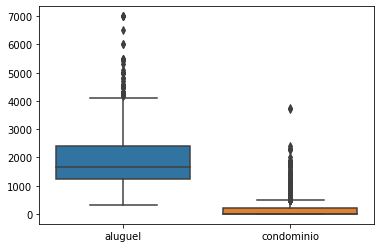

In [15]:
#verificando o gráfico após remoção de outliers
sns.boxplot(data=df, order=['aluguel', 'condominio'])

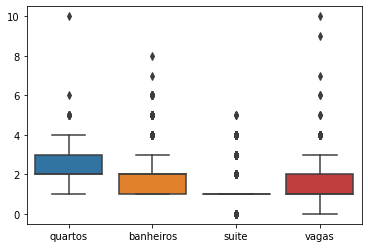

In [16]:
#verificando possíveis outliers nas colunas da mesma escala
sns.boxplot(data=df, order=['quartos', 'banheiros', 'suite', 'vagas'])

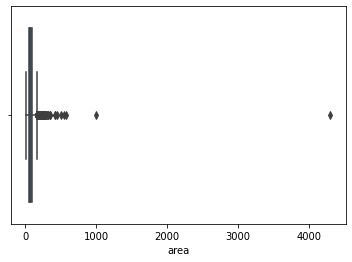

In [17]:
#verificando outliers na coluna "area"
sns.boxplot(df['area'])

In [18]:
#Removendo linhas com valores de área maiores ou iguais a 150
df.drop(df.loc[df['area'] >= 150].index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


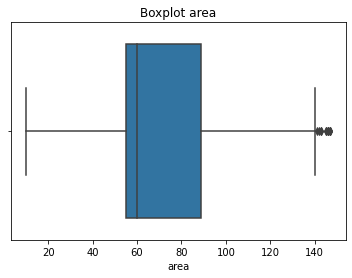

In [19]:
#Verficando o gráfico após remoção
sns.boxplot(df['area'])
plt.title("Boxplot area")
plt.show()

In [20]:
#verificando a tabela de estatísticas após tratamento dos dados numéricos
df.describe()

,aluguel,condominio,iptu,area,quartos,banheiros,suite,vagas
count,1489.000000,1489.000000,1489.000000,1489.000000,1489.00000,1489.000000,1489.000000,1489.000000
mean,1718.124916,123.627267,514.554063,70.147079,2.26998,1.834788,0.982539,1.253190
std,733.865860,238.937188,2930.884613,25.469315,0.65144,0.817877,0.684676,0.683694
min,330.000000,0.000000,0.000000,10.000000,1.00000,1.000000,0.000000,0.000000
25%,1200.000000,0.000000,0.000000,55.000000,2.00000,1.000000,1.000000,1.000000
50%,1600.000000,0.000000,0.000000,60.000000,2.00000,2.000000,1.000000,1.000000
75%,2200.000000,70.000000,0.000000,89.000000,3.00000,2.000000,1.000000,2.000000
max,6000.000000,1670.000000,39145.000000,147.000000,4.00000,5.000000,4.000000,10.000000


É possivel verificar que após tratamento dos valores numéricos todas as colunas estão com valores preenchidos e com um total de 1489 instâncias. 

Pode-se observar que as colunas "aluguel", "condominio", "iptu" e "area" possuem um desvio padrão alto, o que significa que os valores monetários e de área estão mais dispersos que as demais colunas com valores inteiros que descrevem quantidade. 

As colunas "condomínio" e "iptu", possuem todas as ocorrências em "0" até a mediana, e a de "iptu" com "0" até o 3º quartil, porém com valores máximos muito altos, o que pode enviesar o modelo.

# Dividindo o endereço em colunas separadas

In [21]:
#Dividindo a coluna de endereço pelo "-" e definindo como uma série pandas "split_endereco"
split_endereco = df['endereco'].str.split("-")
split_endereco

0       [Rua Professor Arthéphio Bezerra, 210 ,  Lagoa...
1       [Rua Tenente Olávo Francisco dos Santos, 98 , ...
2       [Avenida das Brancas Dunas, 65 ,  Candelária, ...
3       [Avenida Deputado Antônio Florêncio de Queiroz...
4       [Rua Vereador Manoel Coringa de Lemos, 259 ,  ...
                              ...                        
1916    [Rua Historiador Francisco Fausto de Souza, 88...
1917    [Avenida Estrela do Mar, 2215 ,  Ponta Negra, ...
1918                           [Ponta Negra, Natal ,  RN]
1920    [Avenida dos Caiapós, 121 ,  Pitimbu, Natal , ...
1921    [Rua Alexandre Câmara, 1756 ,  Capim Macio, Na...
Name: endereco, Length: 1489, dtype: object

In [22]:
# Pegando o último valor da lista criada para cada linha e definindo como a coluna 'estado'
df['estado'] = split_endereco.str.get(-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
# Dividindo a penúltima posição da lista de cada linha por "," e definindo como uma série pandas "bairro_cidade"
bairro_cidade = split_endereco.str.get(-2).str.split(",")
bairro_cidade

0                [ Lagoa Nova,  Natal ]
1       [ Vila de Ponta Negra,  Natal ]
2                [ Candelária,  Natal ]
3               [ Ponta Negra,  Natal ]
4               [ Ponta Negra,  Natal ]
                     ...               
1916            [ Capim Macio,  Natal ]
1917            [ Ponta Negra,  Natal ]
1918             [Ponta Negra,  Natal ]
1920                [ Pitimbu,  Natal ]
1921            [ Capim Macio,  Natal ]
Name: endereco, Length: 1489, dtype: object

In [24]:
# Pegando o último valor da série pandas "bairro_cidade" criada para cada linha e definindo como a coluna 'cidade'
df['cidade'] = bairro_cidade.str.get(-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
#Removendo os espaços do inicio e do final da coluna "cidade"
df['cidade'] = df['cidade'].str.strip()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
#Pegando a primeira posição da série "bairro_cidade" e definindo como coluna "bairro"
df['bairro'] = bairro_cidade.str.get(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# Removendo os espaços do início e do final da coluna "bairro"
df['bairro'] = df['bairro'].str.strip()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
#Fazendo a contagem dos registros por bairro para verificar inconsistências
df["bairro"].value_counts()

Ponta Negra                509
Capim Macio                234
Lagoa Nova                 179
Tirol                      121
Candelária                  89
Pitimbu                     59
Petrópolis                  55
Neópolis                    46
Barro Vermelho              29
sept Rosado                 27
Alecrim                     27
Areia Preta                 17
Cidade da Esperança         12
Cidade Alta                  9
Nossa Senhora de Nazaré      8
Planalto                     6
PARNAMIRIM                   6
Lagoa Seca                   6
Ribeira                      6
Rocas                        5
Cidade Satelite              5
Igapó                        5
Morro Branco                 5
Vila de Ponta Negra          4
Nova Descoberta              3
Bom Pastor                   3
Cidade Jardim                2
Natal                        2
Praia do Meio                2
Mãe Luíza                    2
Redinha                      2
Conjunto ALAGAMAR            1
C Alta  

In [29]:
#Renomeando valor similar para um valor padrão
df['bairro'] = df['bairro'].replace('C Alta', 'Cidade Alta')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
#Localizando instâncias em que o valor de "bairro" estava definido como nome da cidade
df.loc[df['bairro'] == "Natal"]

,links,endereco,aluguel,tipo_aluguel,condominio,iptu,area,quartos,banheiros,suite,vagas,estado,cidade,bairro
89,https://www.vivareal.com.br/imovel/apartamento...,"Rua Professora Francisca Ivone Cavalcanti, 35 ...",1980.0,/Mês,0.0,0.0,98.0,3.0,3.0,1.0,2.0,RN,Natal,Natal
622,https://www.vivareal.com.br/imovel/apartamento...,"Rua Coronel Auris Coelho, 9700 - Natal - RN",1100.0,/Mês,0.0,0.0,80.0,2.0,2.0,1.0,1.0,RN,Natal,Natal


In [31]:
#Após pesquisa pelo nome da rua e encontrado o bairro correto, o valor foi substituído
df.loc[622, "bairro"] = "Lagoa Nova"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
df.loc[89, "bairro"] = "Vila de Ponta Negra"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
#Localizando instâncias onde o bairro estava definido como "PARNAMIRIM"
df.loc[df['bairro'] == 'PARNAMIRIM']

,links,endereco,aluguel,tipo_aluguel,condominio,iptu,area,quartos,banheiros,suite,vagas,estado,cidade,bairro
332,https://www.vivareal.com.br/imovel/apartamento...,"PARNAMIRIM, Natal - RN",1600.0,/Mês,0.0,0.0,64.0,3.0,2.0,1.0,1.0,RN,Natal,PARNAMIRIM
552,https://www.vivareal.com.br/imovel/apartamento...,"PARNAMIRIM, Natal - RN",1600.0,/Mês,0.0,0.0,64.0,3.0,2.0,1.0,1.0,RN,Natal,PARNAMIRIM
703,https://www.vivareal.com.br/imovel/apartamento...,"PARNAMIRIM, Natal - RN",1200.0,/Mês,440.0,0.0,82.0,3.0,1.0,1.0,1.0,RN,Natal,PARNAMIRIM
714,https://www.vivareal.com.br/imovel/apartamento...,"Avenida dos Eucaliptos, 269 - PARNAMIRIM, Parn...",555.0,/Mês,195.0,0.0,55.0,2.0,1.0,0.0,1.0,RN,Parnamirim,PARNAMIRIM
729,https://www.vivareal.com.br/imovel/apartamento...,"PARNAMIRIM, Natal - RN",670.0,/Mês,260.0,0.0,100.0,3.0,2.0,1.0,1.0,RN,Natal,PARNAMIRIM
1135,https://www.vivareal.com.br/imovel/apartamento...,"PARNAMIRIM, Natal - RN",1400.0,/Mês,0.0,0.0,80.0,3.0,2.0,1.0,1.0,RN,Natal,PARNAMIRIM


In [34]:
#Removendo as instâncias encontradas por não fazer parte da análise
df.drop(df.loc[df['bairro'] == 'PARNAMIRIM'].index, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
#Criando um DataFrame com a quantidade e média de aluguel de apartamentos por bairro
contagem_bairro = pd.DataFrame(df.groupby("bairro")['aluguel'].count())
media_bairro = pd.DataFrame(data = df.groupby("bairro")['aluguel'].mean())
df_qtd_media = pd.merge(contagem_bairro, media_bairro, on='bairro')
df_qtd_media.columns = ['quantidade', 'media']
df_qtd_media.sort_values(by='quantidade', ascending=False)

,quantidade,media
bairro,,
Ponta Negra,509,1897.310413
Capim Macio,234,1697.209402
Lagoa Nova,180,1792.255556
Tirol,121,1896.570248
Candelária,89,1729.471910
Pitimbu,59,1095.932203
Petrópolis,55,1758.490909
Neópolis,46,1444.260870
Barro Vermelho,29,1545.517241


Através do dataframe criado com a quantidade de ocorrências e média de aluguel por bairro, podemos inferir que os bairros que possuem maiores ocorrências representam um valor mais adequado para a média.

In [36]:
# Rotulando os bairros com valores numéricos para o treinamento do modelo de previsão.
encode = preprocessing.LabelEncoder()

In [37]:
encode.fit(df['bairro'])

LabelEncoder()

In [38]:
df['bairro_encoded'] = encode.transform(df[['bairro']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


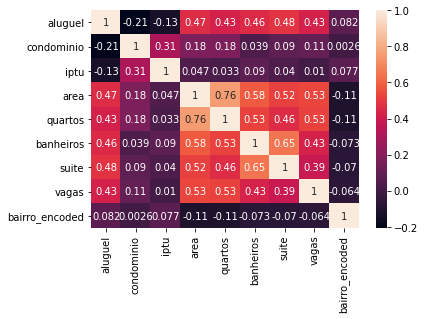

In [39]:
#verificando as correlações entre as variáveis, para a escolha de quais irão ser utilizadas para o treinamento do modelo
sns.heatmap(df.corr(), annot=True)

#Escolha do modelo de Machine Learning

In [40]:
# Padronizando os valores das colunas para a mesma escala
scaler = StandardScaler()
X = scaler.fit_transform(df[['bairro_encoded', 'condominio', 'area','quartos', 'banheiros', 'suite', 'vagas']])

In [41]:
y = scaler.fit_transform(df[['aluguel']])

In [42]:
# Separando 80% dos dados para treino e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [43]:
#Verificando a quantidade de linhas e colunas dos dados de treino e teste
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1186, 7) (297, 7) (1186, 1) (297, 1)


In [44]:
# Instanciando o modelo de Regressão Linear
model_LR = LinearRegression()

In [45]:
# Treinando o modelo com os dados de treino
model_LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Atribuindo a predição a "y_predict_LR" a partir dos dados de teste
y_predict_LR = model_LR.predict(X_test)

In [47]:
# Verificando a métrica de score (Coeficiente de Determinação) e RMSE (Raiz do erro médio quadrático)
score_LR = model_LR.score(X_test, y_test)
RMSE_LR = sqrt(mean_squared_error(y_test, y_predict_LR))
print(f"O score do modelo de Regressão Linear é: {score_LR}")
print(f"O RMSE do modelo de Regressão Linear é: {RMSE_LR}")

O score do modelo de Regressão Linear é: 0.4969762280136643
O RMSE do modelo de Regressão Linear é: 0.6697847924595648


Quanto maior o score, melhor as variáveis explicam o resultado da variável alvo

Quanto menor o RMSE, menor o erro do algoritmo em relação aos valores reais

In [48]:
# Criando um DataFrame com os valores reais e preditos
predicoes = []

In [49]:
predicoes = scaler.inverse_transform(y_test)
predicoes = pd.DataFrame(predicoes, columns=['Real'])
y_predict_LR = scaler.inverse_transform(y_predict_LR)
predicoes['Predict_LR'] = ["%.2f" % y for y in y_predict_LR]
predicoes

,Real,Predict_LR
0,1400.0,1767.55
1,1650.0,1822.77
2,2800.0,3007.07
3,1800.0,2104.49
4,2700.0,1778.56
...,...,...
292,1700.0,1399.68
293,1500.0,1755.23
294,2700.0,2917.92
295,1500.0,1796.11


In [50]:
# Importando biblioteca para a plotagem dos graficos comparativos entre o valore real e predito
import plotly.graph_objects as go

In [51]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=predicoes.index, y=predicoes['Real'], mode='lines+markers', name='Valor Real'))
fig.add_trace(go.Scatter(x=predicoes.index, y=predicoes['Predict_LR'], mode='lines+markers', name='Modelo Regressão Linear'))
fig.show()


In [52]:
# Fazendo o mesmo processo com outro algoritmo de Regressão (Support Vector Regression)
from sklearn.svm import SVR

In [53]:
model_svr = SVR()

In [54]:
model_svr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
y_predict_SVR = model_svr.predict(X_test)

In [56]:
score_svr = model_svr.score(X_test, y_test)
RMSE_svr = sqrt(mean_squared_error(y_test, y_predict_SVR))
print(f"O score do modelo SVR é: {score_svr}")
print(f"O RMSE do modelo SVR é: {RMSE_svr}")

O score do modelo SVR é: 0.5761694553383812
O RMSE do modelo SVR é: 0.6148046647557309


In [57]:
y_predict_SVR = scaler.inverse_transform(y_predict_SVR)

In [58]:
predicoes['Predict_SVR'] = ["%.2f" % y for y in y_predict_SVR]
predicoes

,Real,Predict_LR,Predict_SVR
0,1400.0,1767.55,1820.92
1,1650.0,1822.77,1517.09
2,2800.0,3007.07,1949.24
3,1800.0,2104.49,1951.68
4,2700.0,1778.56,1684.92
...,...,...,...
292,1700.0,1399.68,1128.91
293,1500.0,1755.23,1658.82
294,2700.0,2917.92,3109.85
295,1500.0,1796.11,1977.73


In [59]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=predicoes.index, y=predicoes['Real'], mode='lines+markers', name='Valor Real'))
fig.add_trace(go.Scatter(x=predicoes.index, y=predicoes['Predict_SVR'], mode='lines+markers', name='Modelo SVR'))
fig.show()

In [60]:
# Realizando o mesmo processo com o algorítimo de Árvore de Decisão para Regressão
from sklearn.tree import DecisionTreeRegressor

In [61]:
model_tree = DecisionTreeRegressor()

In [62]:
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [63]:
y_predict_DT = model_tree.predict(X_test)

In [64]:
score_DT = model_tree.score(X_test, y_test)
RMSE_DT = sqrt(mean_squared_error(y_test, y_predict_DT))
print(f"O score do modelo DT é: {score_DT}")
print(f"O RMSE do modelo DT é: {RMSE_DT}")

O score do modelo DT é: 0.3663275714217382
O RMSE do modelo DT é: 0.7517499942207319


In [65]:
y_predict_DT = scaler.inverse_transform(y_predict_DT)

In [66]:
predicoes['Predict_DT'] = ['%.2f' % y for y in y_predict_DT] 
predicoes

,Real,Predict_LR,Predict_SVR,Predict_DT
0,1400.0,1767.55,1820.92,2700.00
1,1650.0,1822.77,1517.09,1600.00
2,2800.0,3007.07,1949.24,2500.00
3,1800.0,2104.49,1951.68,1800.00
4,2700.0,1778.56,1684.92,1918.33
...,...,...,...,...
292,1700.0,1399.68,1128.91,1300.00
293,1500.0,1755.23,1658.82,1483.33
294,2700.0,2917.92,3109.85,2650.00
295,1500.0,1796.11,1977.73,1960.00


In [67]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=predicoes.index, y=predicoes['Real'], mode='lines+markers', name='Valor Real'))
fig.add_trace(go.Scatter(x=predicoes.index, y=predicoes['Predict_DT'], mode='lines+markers', name='Modelo Decision Tree'))
fig.show()

In [68]:
# Realizando o mesmo processo com o algorítmo de Floresta Randomica para Regressão
from sklearn.ensemble import RandomForestRegressor

In [69]:
model_RF = RandomForestRegressor(max_features=3, max_depth=10, random_state=10)

In [70]:
model_RF.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [71]:
y_predict_RF = model_RF.predict(X_test)

In [72]:
score_RF = model_RF.score(X_test, y_test)
RMSE_RF = sqrt(mean_squared_error(y_test, y_predict_RF))
print(f"O score do modelo RF é: {score_RF}")
print(f"O RMSE do modelo RF é: {RMSE_RF}")

O score do modelo RF é: 0.6320889677659751
O RMSE do modelo RF é: 0.572812429616228


In [73]:
y_predict_RF = scaler.inverse_transform(y_predict_RF)

In [74]:
predicoes['Predict_RF'] = ["%.2f" % y for y in y_predict_RF]
predicoes

,Real,Predict_LR,Predict_SVR,Predict_DT,Predict_RF
0,1400.0,1767.55,1820.92,2700.00,1970.23
1,1650.0,1822.77,1517.09,1600.00,1537.77
2,2800.0,3007.07,1949.24,2500.00,2134.65
3,1800.0,2104.49,1951.68,1800.00,1971.87
4,2700.0,1778.56,1684.92,1918.33,1942.21
...,...,...,...,...,...
292,1700.0,1399.68,1128.91,1300.00,1021.73
293,1500.0,1755.23,1658.82,1483.33,1366.05
294,2700.0,2917.92,3109.85,2650.00,2767.30
295,1500.0,1796.11,1977.73,1960.00,1904.34


In [75]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=predicoes.index, y=predicoes['Real'], mode='lines+markers', name='Valor Real'))
fig.add_trace(go.Scatter(x=predicoes.index, y=predicoes['Predict_RF'], mode='lines+markers', name='Modelo Random Forest'))
fig.show()

Após o teste com quatro algorítmos de Regressão Linear, foi verificado que o que melhor se adequa ao problema foi o Random Forest, que atingiu um score R² de 0.63 e um RMSE de 0.57

In [76]:
# Salvando os dados em um arquivo CSV para a entrada no Webapp
df[['bairro','bairro_encoded', 'condominio', 'area','quartos', 'banheiros', 'suite', 'vagas', 'aluguel']].to_csv("data_features.csv")